## Convolutional Neural Networks

##### A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data.

##### In some context, the word convolution is a simple multiplication of frequency domains

### Objectives

- Build an artificial neural network (ANN) model using the convolutional neural network (CNN) architecture
- Use the classifier to classify images (male and female)
- Perform comparison analysis on some of the model parameters


![image](images/cnn_image.jpg)

In [16]:
# Import libraries - pandas, numpy, matplotlib, keras, tensorflow, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import keras
import sklearn
import tensorflow as tf
import  keras.utils as image
from keras.preprocessing.image import ImageDataGenerator as ImgGen

In [21]:
# Import Dataset
sample_data = image.load_img("ImageData\Training\Males\male_1.jpg")
dataset = ImgGen(rescale = 1/255)

In [24]:
# Analyze dataset
dataset = dataset.flow_from_directory("ImageData\Training", target_size=(200,200), batch_size=1, class_mode='binary')

Found 34 images belonging to 2 classes.


In [25]:
dataset.class_indices

{'Females': 0, 'Males': 1}

In [26]:
dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
dataset.image_shape

(200, 200, 3)

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [31]:
# Build CNN Model
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu',input_shape=dataset.image_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
# Build CNN Model
model1 = Sequential()
model1.add(Conv2D(16,(3,3), activation='relu',input_shape=dataset.image_shape))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(64,(3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Flatten())
model1.add(Dense(200, activation='relu'))
model1.add(Dense(2, activation='softmax'))

In [64]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
model1.fit(dataset, epochs=10)

Epoch 1/10
34/34 [==============================] - 5s 97ms/step - loss: 0.9222 - accuracy: 0.5000
Epoch 2/10
34/34 [==============================] - 3s 95ms/step - loss: 0.7006 - accuracy: 0.4118
Epoch 3/10
34/34 [==============================] - 3s 95ms/step - loss: 0.6937 - accuracy: 0.5294
Epoch 4/10
34/34 [==============================] - 4s 105ms/step - loss: 0.6954 - accuracy: 0.4118
Epoch 5/10
34/34 [==============================] - 4s 103ms/step - loss: 1.1169 - accuracy: 0.5588
Epoch 6/10
34/34 [==============================] - 4s 113ms/step - loss: 0.7040 - accuracy: 0.4706
Epoch 7/10
34/34 [==============================] - 3s 101ms/step - loss: 0.6115 - accuracy: 0.8529
Epoch 8/10
34/34 [==============================] - 3s 99ms/step - loss: 0.4552 - accuracy: 0.8529
Epoch 9/10
34/34 [==============================] - 4s 121ms/step - loss: 0.8125 - accuracy: 0.8529
Epoch 10/10
34/34 [==============================] - 4s 106ms/step - loss: 0.2123 - accuracy: 0.9706


In [35]:
# Compile CNN Model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
# Fit CNN Model
model.fit(dataset, epochs=10)

Epoch 1/10
34/34 [==============================] - 5s 90ms/step - loss: 0.7777 - accuracy: 0.2941
Epoch 2/10
34/34 [==============================] - 3s 91ms/step - loss: 0.6995 - accuracy: 0.5882
Epoch 3/10
34/34 [==============================] - 3s 91ms/step - loss: 0.6878 - accuracy: 0.6176
Epoch 4/10
34/34 [==============================] - 3s 92ms/step - loss: 0.7994 - accuracy: 0.6765
Epoch 5/10
34/34 [==============================] - 3s 93ms/step - loss: 0.6844 - accuracy: 0.6765
Epoch 6/10
34/34 [==============================] - 3s 95ms/step - loss: 0.3391 - accuracy: 0.9118
Epoch 7/10
34/34 [==============================] - 3s 97ms/step - loss: 0.3209 - accuracy: 0.9412
Epoch 8/10
34/34 [==============================] - 3s 94ms/step - loss: 0.0802 - accuracy: 0.9706
Epoch 9/10
34/34 [==============================] - 3s 92ms/step - loss: 0.0264 - accuracy: 1.0000
Epoch 10/10
34/34 [==============================] - 3s 91ms/step - loss: 0.0046 - accuracy: 1.0000


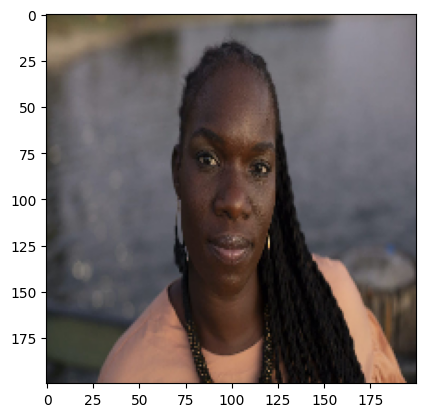

In [67]:
# Results and analysis
test1 = image.load_img('test.jpg', target_size=(200,200))
plt.imshow(test1)

In [47]:
test_image = image.img_to_array(test1)
test_image

array([[[123., 133., 125.],
        [119., 129., 128.],
        [116., 130., 133.],
        ...,
        [110., 113., 104.],
        [114., 115., 101.],
        [113., 113.,  85.]],

       [[118., 129., 121.],
        [118., 129., 125.],
        [125., 139., 139.],
        ...,
        [110., 118., 105.],
        [110., 117., 101.],
        [112., 118.,  92.]],

       [[113., 126., 117.],
        [113., 124., 118.],
        [123., 139., 138.],
        ...,
        [109., 112., 103.],
        [104., 112.,  99.],
        [105., 116., 102.]],

       ...,

       [[161., 192., 187.],
        [158., 187., 183.],
        [161., 186., 182.],
        ...,
        [ 90., 118., 119.],
        [  7.,  37.,  47.],
        [ 21.,  50.,  66.]],

       [[149., 186., 179.],
        [153., 188., 182.],
        [164., 191., 186.],
        ...,
        [ 83., 117., 118.],
        [  8.,  42.,  51.],
        [  0.,  35.,  43.]],

       [[157., 189., 184.],
        [164., 195., 190.],
        [163., 1

In [48]:
test_image.shape

(200, 200, 3)

In [49]:
test_image.ndim

3

In [68]:
final_image = np.expand_dims(test_image, axis=0)

In [69]:
model.predict(final_image)

1/1 [==============================] - 0s 43ms/step


array([[1.]], dtype=float32)

In [70]:
model1.predict(final_image)

1/1 [==============================] - 0s 42ms/step


array([[0., 1.]], dtype=float32)

In [55]:
final_image.ndim
final_image.shape

(1, 200, 200, 3)